In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:

df = pd.read_csv("Zomato_Mumbai_Dataset.csv", sep="|", quotechar='"', engine="python", on_bad_lines="skip")
print(df.info(memory_usage="deep"))
print("Total memory (bytes):", df.memory_usage(deep=True).sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15079 non-null  object
 1   PRICE            15078 non-null  object
 2   CUSINE_CATEGORY  15077 non-null  object
 3   CITY             15078 non-null  object
 4   REGION           15078 non-null  object
 5   URL              15078 non-null  object
 6   PAGE NO          15078 non-null  object
 7   CUSINE TYPE      15078 non-null  object
 8   TIMING           15013 non-null  object
 9   RATING_TYPE      14068 non-null  object
 10  RATING           15078 non-null  object
 11  VOTES            15078 non-null  object
dtypes: object(12)
memory usage: 10.9 MB
None
Total memory (bytes): 11389615


In [4]:
df

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...,...,...,...
15074,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Mumbai,Kandivali West,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15075,PitaBurg,400,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15076,Uncha Otlawala,300,"Desserts,Ice Cream",Mumbai,Kandivali West,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15077,Mandarin Panda,400,"Desserts,Chinese,Thai",Mumbai,Malad West,https://www.zomato.com/mumbai/mandarin-panda-m...,99,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


## Cleaning the dataframe with irrelevent data

In [5]:
df['NAME'].value_counts()

NAME
NAME                             942
China Town                        16
Radha Krishna                     11
Brijwasi Sweets                   11
Red Chilly                        10
                                ... 
Jeenuzz                            1
KGN Momos                          1
Sai Prasad Bar and Restaurant      1
Cream Studio                       1
                                  1
Name: count, Length: 12718, dtype: int64

In [6]:
df['PRICE'].unique()

array(['1200', '400', '1800', '1000', '800', '1300', '1500', '600',
       '1400', '1100', 'PRICE', '2000', '350', '900', '700', '500',
       '1600', '150', '300', '550', '450', '650', '750', '250', '200',
       '850', '100', '2500', '1450', '180', '950', '1700', '1900', '2600',
       '2400', '3000', '1250', '3200', '505', '2200', '1050', '1650',
       '1350', '50', '920', '1150', '1550', '3500', '398', '5000', '120',
       '220', '160', '340', '5', '480', '2100', '580', '1850', '249',
       '80', '2300', '0', '360', '3502', '248', '2700', None],
      dtype=object)

In [7]:
df['CUSINE_CATEGORY'].value_counts()

CUSINE_CATEGORY
CUSINE_CATEGORY                                   942
North Indian,Chinese                              841
Chinese                                           830
Fast Food                                         698
North Indian                                      546
                                                 ... 
Fast Food,Italian,Pizza,Chinese,Street Food         1
Fast Food,Continental,Italian,Mexican               1
Cafe,Fast Food,Beverages,Chinese,Italian,Pizza      1
North Indian,Mangalorean,Malwani,Chinese            1
Desserts,Chinese,Thai                               1
Name: count, Length: 3183, dtype: int64

In [8]:
df['CUSINE TYPE'].unique()

array(['Casual Dining', 'Dessert Parlor', 'Bar', 'Café', 'CUSINE TYPE',
       'Quick Bites', 'none', 'Bakery', 'Sweet Shop', 'Food Court',
       'Fine Dining', 'Beverage Shop', 'Pub', 'Food Truck', 'Dhaba',
       'Lounge', 'Kiosk', 'Microbrewery', 'Paan Shop', 'Irani Cafe',
       'Confectionery', 'Bhojanalya', 'Mess', None], dtype=object)

In [9]:
df['RATING_TYPE'].unique()

array(['Excellent', 'Very Good', 'Veľmi dobré', 'RATING_TYPE', 'Good',
       'Velmi dobré', 'Not rated', nan, 'Average', 'Excelente',
       'Muito Bom', 'Poor', 'Skvělá volba', 'Çok iyi', 'Baik',
       'Bardzo dobrze', 'Bom', 'Média', 'Dobrze', 'Buono', 'İyi', 'Bueno',
       'Ortalama', 'Skvělé', 'Biasa', 'Průměr', 'Sangat Baik', 'Priemer',
       'Dobré', 'Promedio', 'Muy Bueno', 'Media', None], dtype=object)

In [10]:
df['RATING'].unique()

array(['4.9', '4.4', '4.2', '4.3', '4.5', '4.7', '4.0', '4.6', '4.1',
       'RATING', '3.9', '3.8', '-', '3.6', 'NEW', '3.4', '3.0', '3.7',
       '4.8', '3.3', '3.5', '3.2', '3.1', '2.7', '2.5', '2.8', '2.6',
       '2.3', '2.9', '2.4', 'Opening', '2.1', '2.2', '1.8', '2.0', None],
      dtype=object)

## Replace bad values with NaN

In [11]:
values_to_replace = [
    'NAME', 'PRICE', 'CUSINE_CATEGORY', 'CUSINE_TYPE', 
    'TIMING', 'RATING_TYPE', 'RATING', '-', 'VOTES','REGION','None','?',''
]
df.replace(values_to_replace, np.nan, inplace=True)

## Converting the datatypes of numerical columns.

In [12]:

df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')
df['VOTES'] = pd.to_numeric(df['VOTES'], errors='coerce')
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')

## Rename columns with correct spellings.

In [13]:
df.rename({'CUSINE_CATEGORY' : 'CUISINE_CATEGORY', 'CUSINE TYPE' : 'OUTLET_TYPE', 'RATING_TYPE': 'REVIEWS'},axis=1, inplace=True)

In [14]:
df

,NAME,PRICE,CUISINE_CATEGORY,CITY,REGION,URL,PAGE NO,OUTLET_TYPE,TIMING,REVIEWS,RATING,VOTES
0,Hitchki,1200.0,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529.0
1,Baba Falooda,400.0,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723.0
2,Chin Chin Chu,1800.0,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337.0
3,Butterfly High,1000.0,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200.0
4,BKC DIVE,1200.0,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15074,Hari Om Snack Bar,350.0,"Fast Food,South Indian,Chinese",Mumbai,Kandivali West,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64.0
15075,PitaBurg,400.0,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99.0
15076,Uncha Otlawala,300.0,"Desserts,Ice Cream",Mumbai,Kandivali West,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29.0
15077,Mandarin Panda,400.0,"Desserts,Chinese,Thai",Mumbai,Malad West,https://www.zomato.com/mumbai/mandarin-panda-m...,99,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121.0


## Count NaN Values in Each Column

In [15]:
print(df.isnull().sum())

NAME                 942
PRICE                943
CUISINE_CATEGORY     944
CITY                   1
REGION               943
URL                    1
PAGE NO                1
OUTLET_TYPE            1
TIMING              1008
REVIEWS             1953
RATING              4313
VOTES               4313
dtype: int64


## Replacing PRICE NaN Values with Mean

In [16]:
avg_of_price = df['PRICE'].astype("float").mean()

In [17]:
avg_of_price

np.float64(480.98026315789474)

In [18]:
df['PRICE'] = df['PRICE'].fillna(avg_of_price)

In [19]:
df['PRICE'].isnull().sum()

np.int64(0)

In [20]:
df['PRICE'].notnull().sum()

np.int64(15079)

## Detectiong outliers in PRICE column

In [21]:
df['PRICE'].unique()

array([1200.        ,  400.        , 1800.        , 1000.        ,
        800.        , 1300.        , 1500.        ,  600.        ,
       1400.        , 1100.        ,  480.98026316, 2000.        ,
        350.        ,  900.        ,  700.        ,  500.        ,
       1600.        ,  150.        ,  300.        ,  550.        ,
        450.        ,  650.        ,  750.        ,  250.        ,
        200.        ,  850.        ,  100.        , 2500.        ,
       1450.        ,  180.        ,  950.        , 1700.        ,
       1900.        , 2600.        , 2400.        , 3000.        ,
       1250.        , 3200.        ,  505.        , 2200.        ,
       1050.        , 1650.        , 1350.        ,   50.        ,
        920.        , 1150.        , 1550.        , 3500.        ,
        398.        , 5000.        ,  120.        ,  220.        ,
        160.        ,  340.        ,    5.        ,  480.        ,
       2100.        ,  580.        , 1850.        ,  249.     

In [22]:
df['PRICE'].min()

0.0

In [23]:
df['PRICE'].max()

5000.0

In [24]:
df['PRICE'] = df['PRICE'].replace(0, np.nan)
df['PRICE'] = df['PRICE'].replace(5, np.nan)


In [25]:
median_of_price = df['PRICE'].median()

In [26]:
median_of_price

450.0

In [27]:
df['PRICE'] = df['PRICE'].fillna(median_of_price)

In [28]:
df['PRICE'].isnull().sum()

np.int64(0)

## Replacing CUISINE_CATEGORY NaN Values with Mode

In [29]:
df['CUISINE_CATEGORY'].unique()

array(['Modern Indian,North Indian,Chinese,Momos,Biryani,Continental,American,Fast Food',
       'Desserts,Ice Cream,Beverages', 'Asian,Chinese', ...,
       'Continental,Italian,Seafood,North Indian,Cafe',
       'Desserts,Chinese,Thai', None], shape=(3184,), dtype=object)

In [30]:
df['CUISINE_CATEGORY'].value_counts()

CUISINE_CATEGORY
North Indian,Chinese                              841
Chinese                                           830
Fast Food                                         698
North Indian                                      546
Chinese,North Indian                              433
                                                 ... 
Fast Food,Italian,Pizza,Chinese,Street Food         1
Fast Food,Continental,Italian,Mexican               1
Cafe,Fast Food,Beverages,Chinese,Italian,Pizza      1
North Indian,Mangalorean,Malwani,Chinese            1
Desserts,Chinese,Thai                               1
Name: count, Length: 3182, dtype: int64

In [31]:
# in  CUISINE_CATEGORY we have most occured value is "North Indian,Chinese" , so we replace allNaN values with "North Indian,Chinese"
df['CUISINE_CATEGORY'] = df['CUISINE_CATEGORY'].fillna("North Indian,Chinese")

In [32]:
df['CUISINE_CATEGORY'].isnull().sum()

np.int64(0)

## Cleaning REGION column

In [33]:
df['REGION'].unique()

array(['First International Financial Centre-- Bandra Kurla Complex',
       'Mahim', 'Juhu', 'Bandra Kurla Complex', 'Flea Bazaar Café',
       'Marol', 'Oshiwara-- Andheri West', 'Kamala Mills Compound',
       'Dadar West', 'Khar', 'Lower Parel', 'Pali Hill-- Bandra West',
       nan, 'Mumbai CST Area', 'Bhandup', 'Malad West', 'Powai',
       'Chembur', 'Goregaon West', 'Andheri Lokhandwala-- Andheri West',
       'Reclamation-- Bandra West', 'Vile Parle East',
       'Palladium Mall-- Lower Parel', 'CBD-Belapur', 'Ghansoli',
       'Borivali West', 'Near Andheri East Station', 'Vasai',
       'Goregaon East', 'Castle Mill-- Thane West', 'Worli', 'Parel',
       'Vasant Vihar-- Thane West', 'Colaba', 'Nariman Point',
       'Naupada-- Thane West', 'Versova-- Andheri West', 'Santacruz East',
       'Mulund West', 'Kandivali East', 'Panch Pakhadi-- Thane West',
       'Mahakali', 'Airoli', 'Hill Road-- Bandra West', 'Mira Road',
       'Fort', 'Ghodbunder Road', 'Jogeshwari', 'Vashi'

In [34]:
# Cleaning REGION column 1, replacing with base region

df['REGION'] = df['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)
df['REGION'] = df['REGION'].str.replace(' West| west| East| east','',regex=True)

In [35]:
df['REGION'].unique()

array(['Bandra Kurla Complex', 'Mahim', 'Juhu', 'Flea Bazaar Café',
       'Marol', 'Andheri', 'Kamala Mills Compound', 'Dadar', 'Khar',
       'Lower Parel', 'Bandra', nan, 'Mumbai CST Area', 'Bhandup',
       'Malad', 'Powai', 'Chembur', 'Goregaon', 'Vile Parle',
       'CBD-Belapur', 'Ghansoli', 'Borivali', 'Near Andheri Station',
       'Vasai', 'Thane', 'Worli', 'Parel', 'Colaba', 'Nariman Point',
       'Santacruz', 'Mulund', 'Kandivali', 'Mahakali', 'Airoli',
       'Mira Road', 'Fort', 'Ghodbunder Road', 'Jogeshwari', 'Vashi',
       'Ghatkopar', 'Sakinaka', '7 Andheri', 'Byculla', 'Kalyan',
       'Bhayandar', 'Charni Road', 'Chandivali', 'Kurla',
       'Mohammad Ali Road', 'Kharghar', 'Matunga', 'Dadar Shivaji Park',
       'Azad Nagar', 'Ulhasnagar', '4 Bungalows', 'Kopar Khairane',
       'Dahisar', 'Seawoods', 'Mumbai Central', 'Veera Desai Area',
       'Chowpatty', 'Old Panvel', 'Sion', 'Tardeo', 'Mazgaon',
       'Prabhadevi', 'Sanpada', 'Virar', 'Girgaum', 'Mumbra', '

In [36]:
# final Cleaning REGION column replacing with base region

df['REGION'] = df['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area|Mahakali','Andheri',regex=True)
df['REGION'] = df['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
df['REGION'] = df['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
df['REGION'] = df['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
df['REGION'] = df['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
df['REGION'] = df['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
df['REGION'] = df['REGION'].str.replace('Runwal Green','Mulund',regex=True)
df['REGION'] = df['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
df['REGION'] = df['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
df['REGION'] = df['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
df['REGION'] = df['REGION'].str.replace('Kamothe','Sion',regex=True)
df['REGION'] = df['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

In [37]:
df['REGION'].unique()

array(['Bandra', 'Mahim', 'Juhu', 'Lower Parel', 'Marol', 'Andheri',
       'Dadar', 'Khar', nan, 'Mumbai Central', 'Bhandup', 'Malad',
       'Powai', 'Chembur', 'Goregaon', 'Vile Parle', 'CBD Belapur',
       'Ghansoli', 'Borivali', 'Vasai', 'Thane', 'Worli', 'Parel',
       'Colaba', 'Nariman Point', 'Santacruz', 'Mulund', 'Kandivali',
       'Airoli', 'Mira Road', 'Fort', 'Jogeshwari', 'Vashi', 'Ghatkopar',
       'Sakinaka', 'Byculla', 'Kalyan', 'Bhayandar', 'Charni Road',
       'Chandivali', 'Kurla', 'Mohammad Ali Road', 'Kharghar', 'Matunga',
       'Ulhasnagar', 'Navi Mumbai', 'Dahisar', 'Chowpatty', 'Panvel',
       'Sion', 'Tardeo', 'Mazgaon', 'Prabhadevi', 'Sanpada', 'Virar',
       'Girgaum', 'Mumbra', 'Marve', 'Chakala', 'Marine Lines',
       'Mahalaxmi', 'Nalasopara', 'Kalwa', 'Nerul', 'Grant Road',
       'Breach Candy', 'Churchgate', 'Vikhroli', 'Kalbadevi', 'Dombivali',
       'Kemps Corner', 'Malabar Hill', 'Kalamboli', 'Wadala', 'Alibaug',
       'Peddar Road', 'Am

## Replacing OUTLET_TYPE NaN Values with Mode

In [38]:
df['OUTLET_TYPE'].unique()

array(['Casual Dining', 'Dessert Parlor', 'Bar', 'Café', 'CUSINE TYPE',
       'Quick Bites', 'none', 'Bakery', 'Sweet Shop', 'Food Court',
       'Fine Dining', 'Beverage Shop', 'Pub', 'Food Truck', 'Dhaba',
       'Lounge', 'Kiosk', 'Microbrewery', 'Paan Shop', 'Irani Cafe',
       'Confectionery', 'Bhojanalya', 'Mess', None], dtype=object)

In [39]:
df['OUTLET_TYPE'] = df['OUTLET_TYPE'].replace("none", np.nan)

In [40]:
df['OUTLET_TYPE'].value_counts()

OUTLET_TYPE
Quick Bites       5262
Casual Dining     4721
CUSINE TYPE        942
Bakery             774
Dessert Parlor     584
Café               349
Sweet Shop         163
Beverage Shop      131
Food Court          78
Dhaba               54
Bar                 50
Food Truck          41
Fine Dining         35
Lounge              29
Kiosk               23
Pub                 17
Paan Shop           11
Bhojanalya           6
Confectionery        5
Mess                 2
Microbrewery         1
Irani Cafe           1
Name: count, dtype: int64

In [41]:
# in "OUTLET_TYPE" we have most occured value is "Quick Bites" , so we replace allNaN values with "Quick Bites"
df['OUTLET_TYPE'] = df['OUTLET_TYPE'].fillna("Quick Bites")

In [42]:
df['OUTLET_TYPE'].value_counts()

OUTLET_TYPE
Quick Bites       7062
Casual Dining     4721
CUSINE TYPE        942
Bakery             774
Dessert Parlor     584
Café               349
Sweet Shop         163
Beverage Shop      131
Food Court          78
Dhaba               54
Bar                 50
Food Truck          41
Fine Dining         35
Lounge              29
Kiosk               23
Pub                 17
Paan Shop           11
Bhojanalya           6
Confectionery        5
Mess                 2
Microbrewery         1
Irani Cafe           1
Name: count, dtype: int64

In [43]:
df['OUTLET_TYPE'].isnull().sum()

np.int64(0)

## Cleaning REVIEWS  Column

In [44]:
df['REVIEWS'].unique()

array(['Excellent', 'Very Good', 'Veľmi dobré', nan, 'Good',
       'Velmi dobré', 'Not rated', 'Average', 'Excelente', 'Muito Bom',
       'Poor', 'Skvělá volba', 'Çok iyi', 'Baik', 'Bardzo dobrze', 'Bom',
       'Média', 'Dobrze', 'Buono', 'İyi', 'Bueno', 'Ortalama', 'Skvělé',
       'Biasa', 'Průměr', 'Sangat Baik', 'Priemer', 'Dobré', 'Promedio',
       'Muy Bueno', 'Media', None], dtype=object)

In [45]:
rating_mapping = {
    # --- Excellent ---
    'Excellent': 'Excellent',
    'Excelente': 'Excellent',  
    'Skvělá volba': 'Excellent', 
    'Skvělé': 'Excellent',      

    # --- Very Good ---
    'Very Good': 'Very Good',
    'Muito Bom': 'Very Good',    
    'Sangat Baik': 'Very Good',  
    'Bardzo dobrze': 'Very Good', 
    'Muy Bueno': 'Very Good',    
    'Velmi dobré': 'Very Good',  
    'Dobrze': 'Very Good',       
    'Dobre': 'Very Good',       
    'Buono': 'Very Good',
    'Velmi dobré': 'Very Good',
    'Buono': 'Very Good',
    'Dobré': 'Very Good',
    'Veľmi dobré': 'Very Good',
    

    # --- Good ---
    'Good': 'Good',
    'Baik': 'Good',              
    'İyi': 'Good',               
    'Çok iyi': 'Good',          
    'Bom': 'Good',    
    'Bueno': 'Good',

    # --- Average ---
    'Average': 'Average',
    'Průměr': 'Average',        
    'Ortalama': 'Average',       
    'Media': 'Average',         
    'Média': 'Average',          
    'Promedio': 'Average',      
    'Biasa': 'Average',          

    # --- Poor ---
    'Poor': 'Poor',
    'Priemer': 'Poor',           

    # --- Missing / Not Rated ---
    'nan': np.nan,               
    np.nan: np.nan,              
    'None': np.nan,              
    'Not rated': np.nan          
}


df['REVIEWS'] = df['REVIEWS'].replace(rating_mapping)

In [46]:
df['REVIEWS'].unique()

array(['Excellent', 'Very Good', nan, 'Good', 'Average', 'Poor'],
      dtype=object)

In [47]:
df['REVIEWS'].value_counts()

REVIEWS
Average      5121
Good         4337
Very Good    1158
Excellent     101
Poor           49
Name: count, dtype: int64

In [48]:
df['REVIEWS'].isnull().sum()

np.int64(4313)

#### We cannot impute missing values in the 'REVIEWS' column with the Mode, as it is our Target Variable (the output we want to predict). 

In [49]:
df.dropna(subset=['REVIEWS'], inplace=True)

In [50]:
df['REVIEWS'].isnull().sum()

np.int64(0)

## Cleaning 'RATING' NaN with 

In [51]:
df['VOTES'].unique()

array([3529., 1723.,  337., ...,  944.,  861., 1249.], shape=(1120,))

In [52]:
df['VOTES'].value_counts()

VOTES
4.0       364
5.0       320
6.0       288
7.0       277
8.0       258
         ... 
1029.0      1
7350.0      1
964.0       1
585.0       1
1249.0      1
Name: count, Length: 1120, dtype: int64

In [53]:
df['VOTES'].isnull().any()

np.False_

In [54]:
df['VOTES'].isnull().sum()

np.int64(0)

In [55]:
df['VOTES'].notnull().sum()

np.int64(10766)

In [56]:
df['VOTES'].isnull().any()

np.False_

## Cleaning NAME Column

In [57]:
df['NAME'].isnull().sum()

np.int64(0)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10766 entries, 0 to 15077
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              10766 non-null  object 
 1   PRICE             10766 non-null  float64
 2   CUISINE_CATEGORY  10766 non-null  object 
 3   CITY              10766 non-null  object 
 4   REGION            10766 non-null  object 
 5   URL               10766 non-null  object 
 6   PAGE NO           10766 non-null  object 
 7   OUTLET_TYPE       10766 non-null  object 
 8   TIMING            10760 non-null  object 
 9   REVIEWS           10766 non-null  object 
 10  RATING            10766 non-null  float64
 11  VOTES             10766 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [59]:
df.dropna(subset=['NAME'], inplace=True)

### Drop Duplicates

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10766 entries, 0 to 15077
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              10766 non-null  object 
 1   PRICE             10766 non-null  float64
 2   CUISINE_CATEGORY  10766 non-null  object 
 3   CITY              10766 non-null  object 
 4   REGION            10766 non-null  object 
 5   URL               10766 non-null  object 
 6   PAGE NO           10766 non-null  object 
 7   OUTLET_TYPE       10766 non-null  object 
 8   TIMING            10760 non-null  object 
 9   REVIEWS           10766 non-null  object 
 10  RATING            10766 non-null  float64
 11  VOTES             10766 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [62]:
df.reset_index(drop=True, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10766 entries, 0 to 10765
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              10766 non-null  object 
 1   PRICE             10766 non-null  float64
 2   CUISINE_CATEGORY  10766 non-null  object 
 3   CITY              10766 non-null  object 
 4   REGION            10766 non-null  object 
 5   URL               10766 non-null  object 
 6   PAGE NO           10766 non-null  object 
 7   OUTLET_TYPE       10766 non-null  object 
 8   TIMING            10760 non-null  object 
 9   REVIEWS           10766 non-null  object 
 10  RATING            10766 non-null  float64
 11  VOTES             10766 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1009.4+ KB


In [64]:
df.to_csv('Final_Clean_Zomato_Mumbai_Dataset.csv', index=False)   

In [65]:
## here we have Now fresh 10767 records/sample.

## "EXPLORATORY DATA ANALYSIS"

### Univariate Analysis (Understanding Each Column)

#### How are the 'REVIEWS' distributed?

Count of each REVIEWS category:
REVIEWS
Average      5121
Good         4337
Very Good    1158
Excellent     101
Poor           49
Name: count, dtype: int64


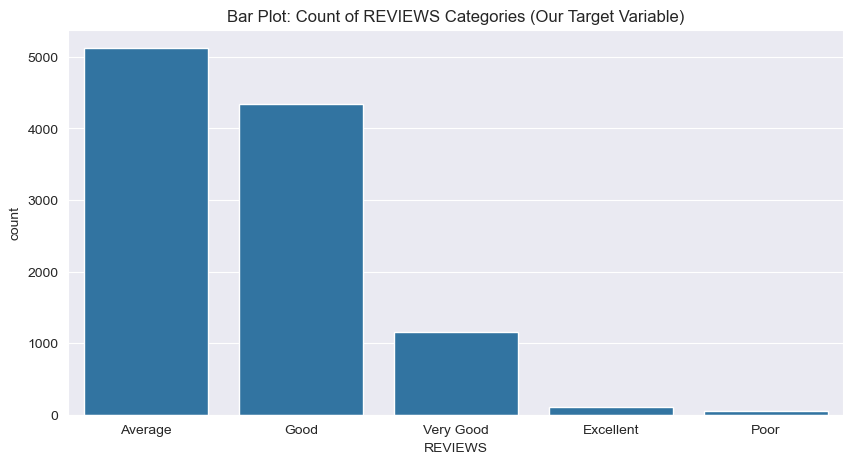

In [66]:
# Set a style for our plots
sns.set_style("darkgrid")

# Set the size of all plots
plt.rcParams['figure.figsize'] = (10, 5)

print("Count of each REVIEWS category:")
print(df['REVIEWS'].value_counts())

plt.title('Bar Plot: Count of REVIEWS Categories (Our Target Variable)')
sns.countplot(x='REVIEWS', data=df, order=df['REVIEWS'].value_counts().index)
plt.show()

#### What is the distribution of numeric RATING

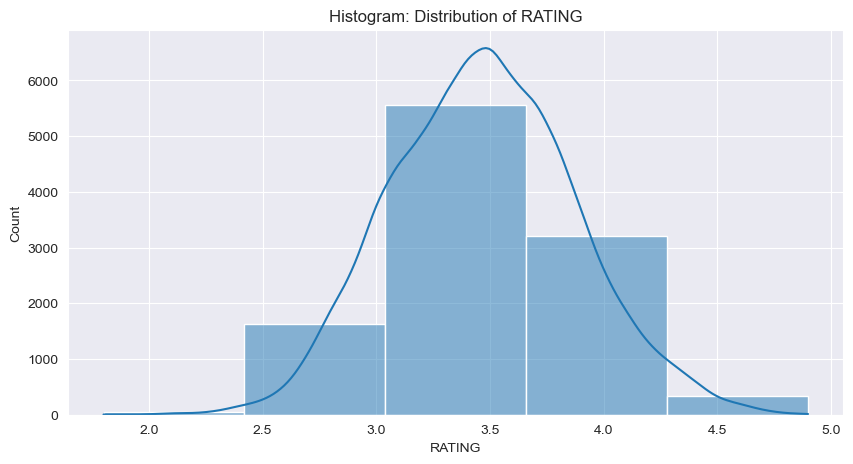

In [67]:
plt.title('Histogram: Distribution of RATING')
sns.histplot(df['RATING'], kde=True, bins=5) # kde=True adds the smooth line
plt.show()

#### What is the distribution of PRICE?

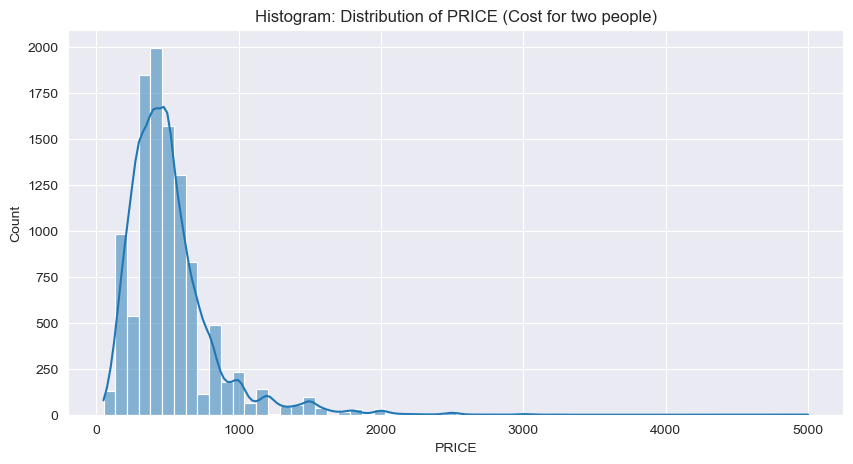

In [68]:
plt.title('Histogram: Distribution of PRICE (Cost for two people)')
sns.histplot(df['PRICE'], kde=True, bins=60)
plt.show()

#### What is the distribution of VOTES?

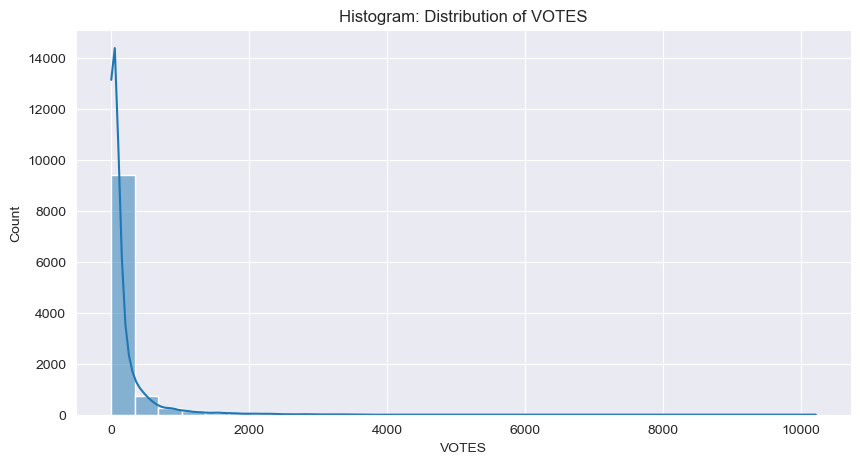

In [69]:
plt.title('Histogram: Distribution of VOTES')
sns.histplot(df['VOTES'], kde=True, bins=30)
plt.show()

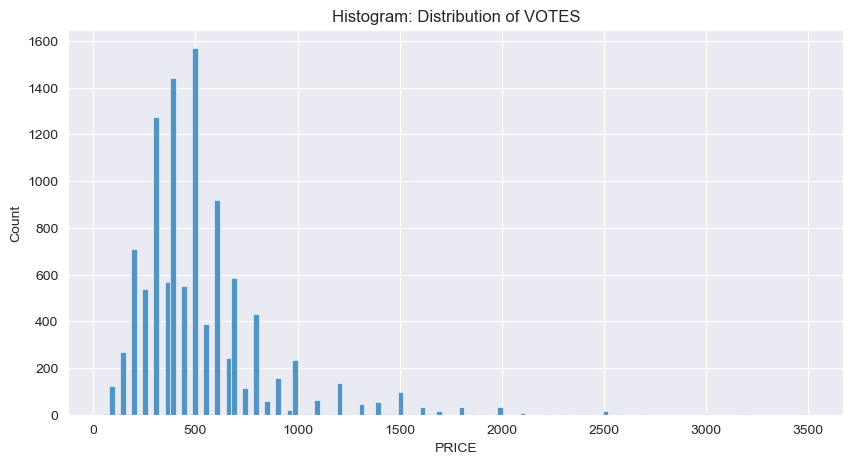

In [70]:
plt.title('Histogram: Distribution of VOTES')
sns.histplot(df['PRICE'][df['PRICE'] < 4000])
plt.show()

#### What are the Top 10 REGIONS with the most restaurants?

Top 10 Regions by Restaurant Count:
REGION
Andheri      904
Thane        770
Mira Road    412
Malad        379
Kandivali    377
Bandra       376
Goregaon     327
Borivali     317
Dombivali    302
Chembur      281
Name: count, dtype: int64


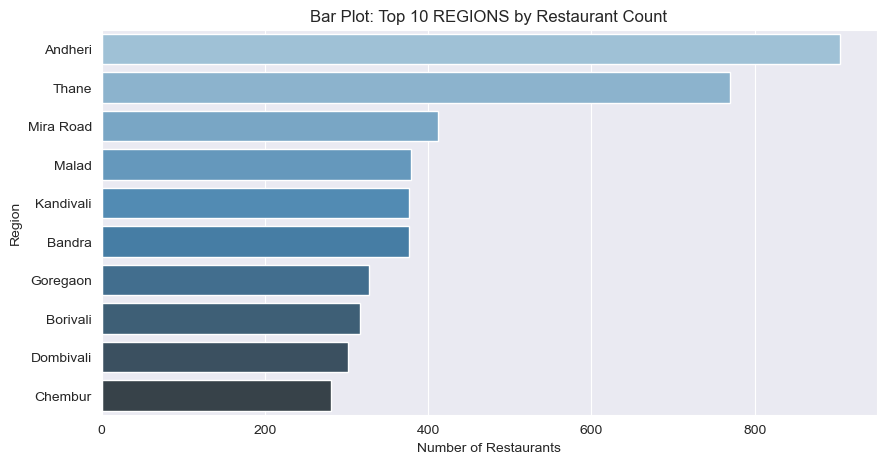

In [71]:
# Get the top 10 regions
top_10_regions = df['REGION'].value_counts().head(10)

print("Top 10 Regions by Restaurant Count:")
print(top_10_regions)

plt.title('Bar Plot: Top 10 REGIONS by Restaurant Count')

sns.barplot(x=top_10_regions.values, y=top_10_regions.index, hue=top_10_regions.index, palette='Blues_d', legend=False)
plt.xlabel('Number of Restaurants')
plt.ylabel('Region')
plt.show()

#### What are the Top 10 most common OUTLET_TYPEs?

Top 10 Outlet Types by Restaurant Count:
OUTLET_TYPE
Quick Bites       4769
Casual Dining     4195
Bakery             544
Dessert Parlor     437
Café               324
Sweet Shop         123
Beverage Shop       93
Food Court          53
Bar                 47
Dhaba               41
Name: count, dtype: int64


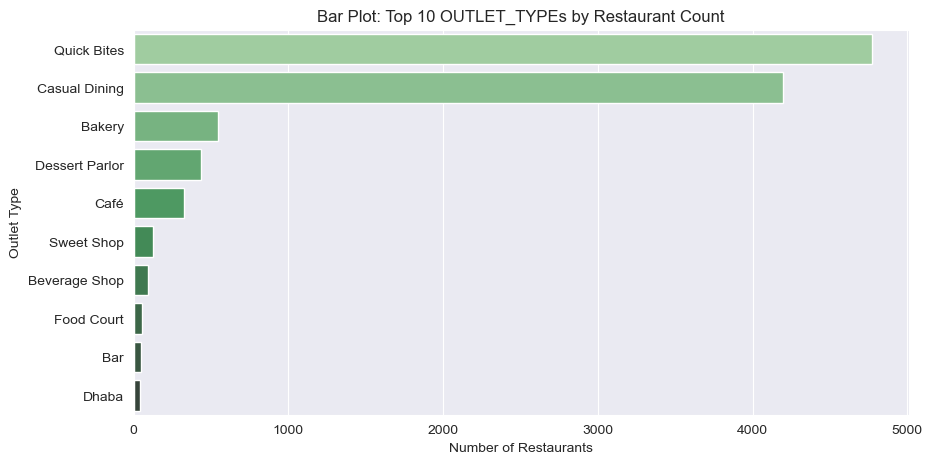

In [72]:
# Get the top 10 outlet types
top_10_outlets = df['OUTLET_TYPE'].value_counts().head(10)

print("Top 10 Outlet Types by Restaurant Count:")
print(top_10_outlets)

plt.title('Bar Plot: Top 10 OUTLET_TYPEs by Restaurant Count')

sns.barplot(x=top_10_outlets.values, y=top_10_outlets.index, hue=top_10_outlets.index, palette='Greens_d', legend=False)
plt.xlabel('Number of Restaurants')
plt.ylabel('Outlet Type')
plt.show()

#### What are the Top 10 most common CUISINE_CATEGORYs?

Top 10 Cuisine Categories by Restaurant Count:
CUISINE_CATEGORY
North Indian,Chinese            620
Chinese                         517
Fast Food                       460
North Indian                    327
Chinese,North Indian            302
Bakery,Desserts                 294
Bakery                          181
North Indian,Chinese,Seafood    153
Desserts                        149
North Indian,Mughlai,Chinese    119
Name: count, dtype: int64


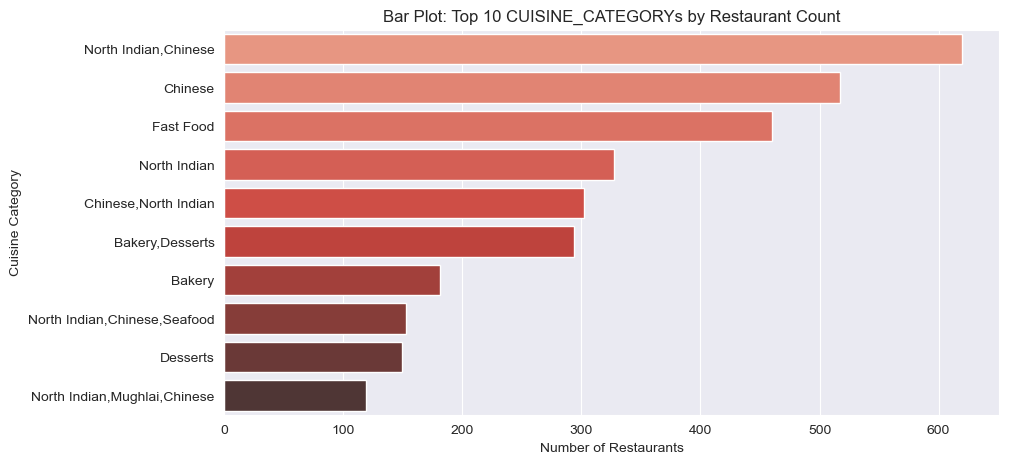

In [73]:
# Get the top 10 cuisine categories
top_10_cuisines = df['CUISINE_CATEGORY'].value_counts().head(10)

print("Top 10 Cuisine Categories by Restaurant Count:")
print(top_10_cuisines)

plt.title('Bar Plot: Top 10 CUISINE_CATEGORYs by Restaurant Count')

sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, hue=top_10_cuisines.index, palette='Reds_d', legend=False)
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Category')
plt.show()

### Bivariate Analysis (Finding Relationships)

#### How does RATING relate to PRICE?

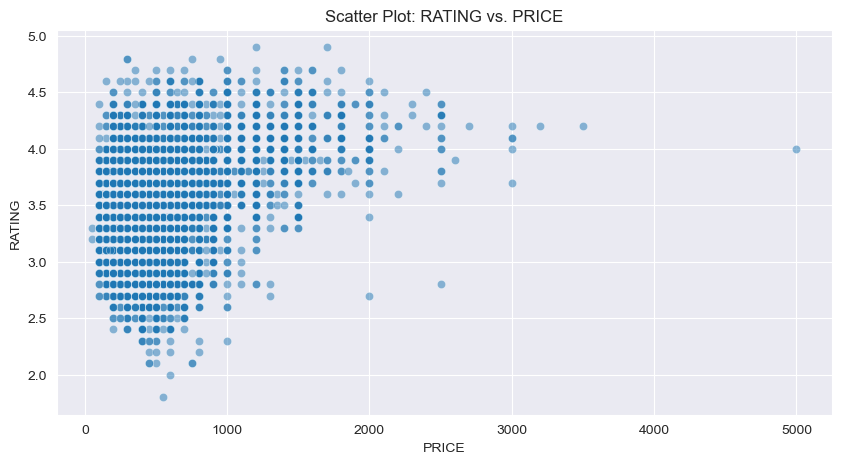

In [74]:
plt.title('Scatter Plot: RATING vs. PRICE')
sns.scatterplot(x='PRICE', y='RATING', data=df, alpha=0.5) # alpha=0.5 makes dots transparent
plt.show()

#### How does RATING relate to VOTES?

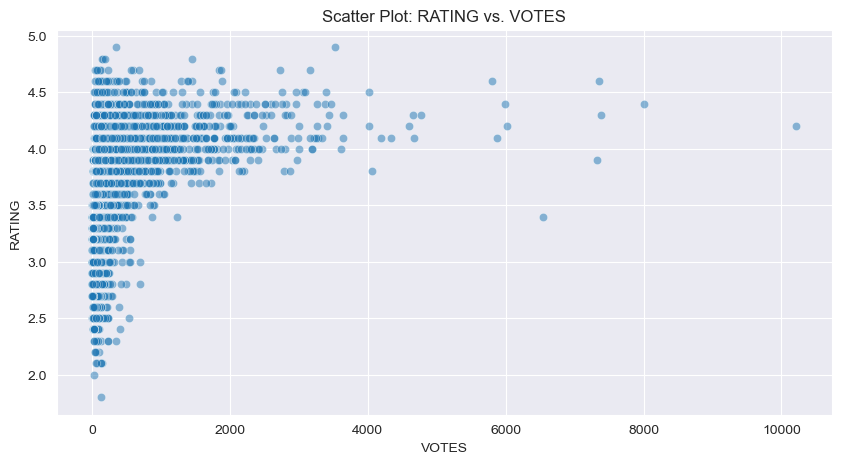

In [75]:
plt.title('Scatter Plot: RATING vs. VOTES')
sns.scatterplot(y='RATING', x='VOTES', data=df, alpha=0.5)
plt.show()

#### Which OUTLET_TYPE gets the best ratings?

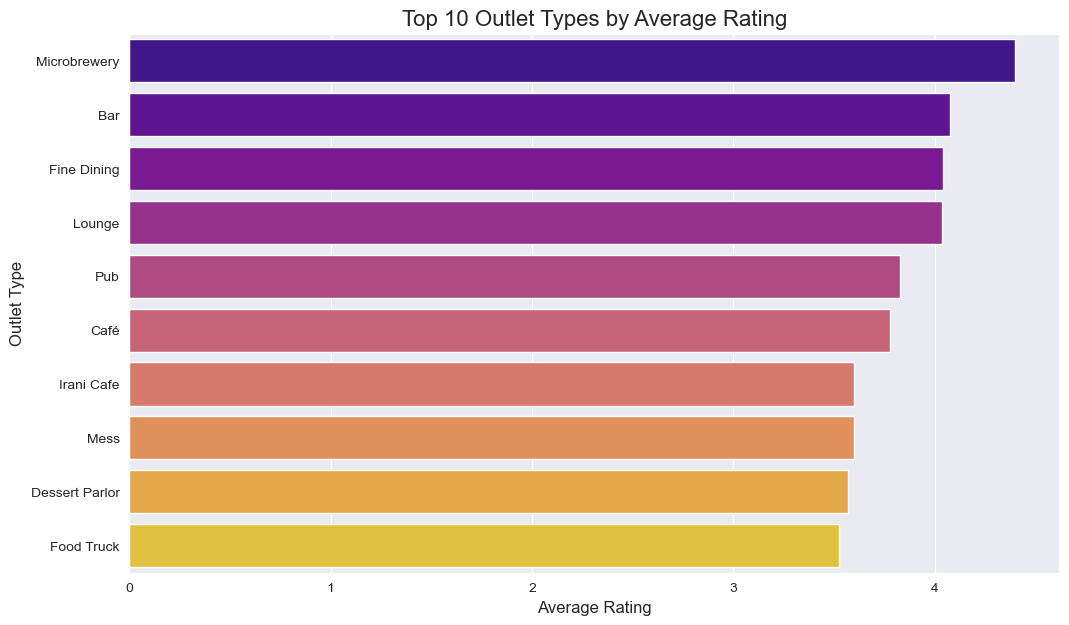

In [76]:
top_10_outlets = df.groupby('OUTLET_TYPE')['RATING'].mean().sort_values(ascending=False).head(10)

# --- Now, we plot the result ---
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_outlets.values, y=top_10_outlets.index, palette='plasma')

plt.title('Top 10 Outlet Types by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Outlet Type', fontsize=12)
plt.show()

#### Which Top 10 REGIONS have the best ratings?

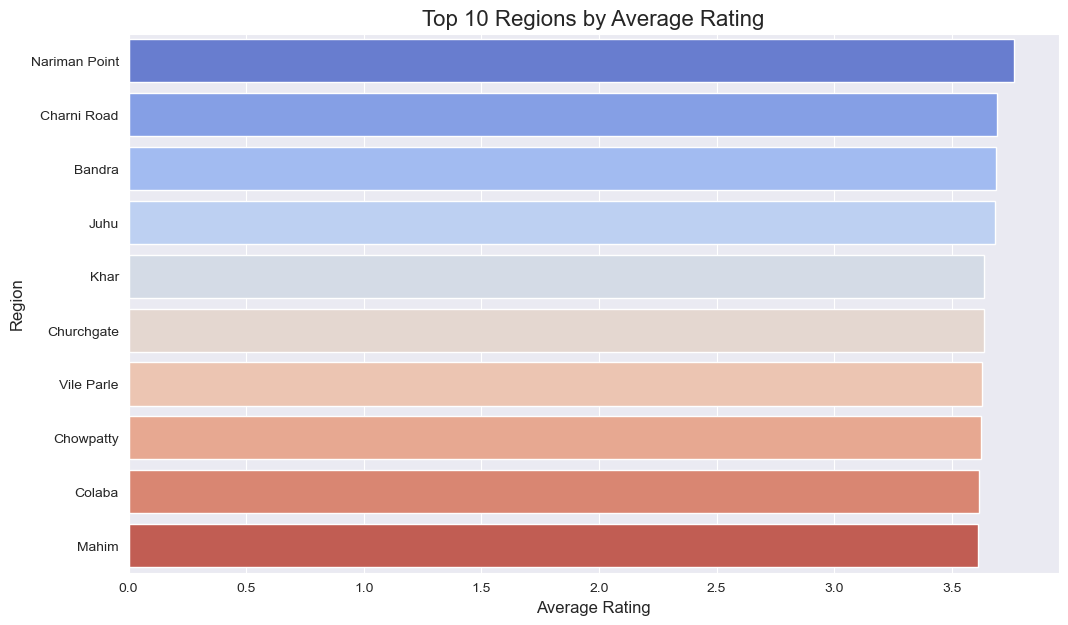

In [77]:
top_10_regions = df.groupby('REGION')['RATING'].mean().sort_values(ascending=False).head(10)

# --- Now, we plot the result ---
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_regions.values, y=top_10_regions.index, palette='coolwarm')

plt.title('Top 10 Regions by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

#### Which Top 10 CUISINE_CATEGORYs have the best ratings?

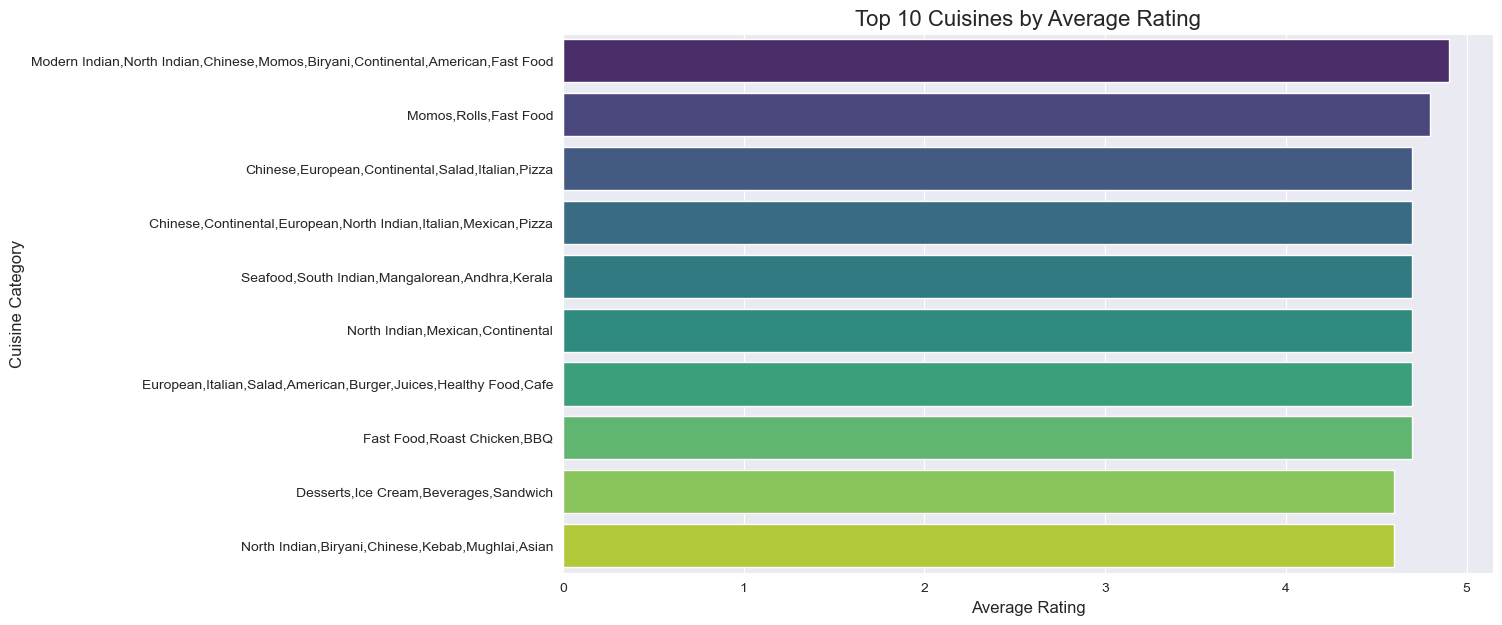

In [78]:

top_10_cuisines = df.groupby('CUISINE_CATEGORY')['RATING'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index, palette='viridis')

plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine Category', fontsize=12)
plt.show()

#### Graph for percentage of restaurants as per ratings

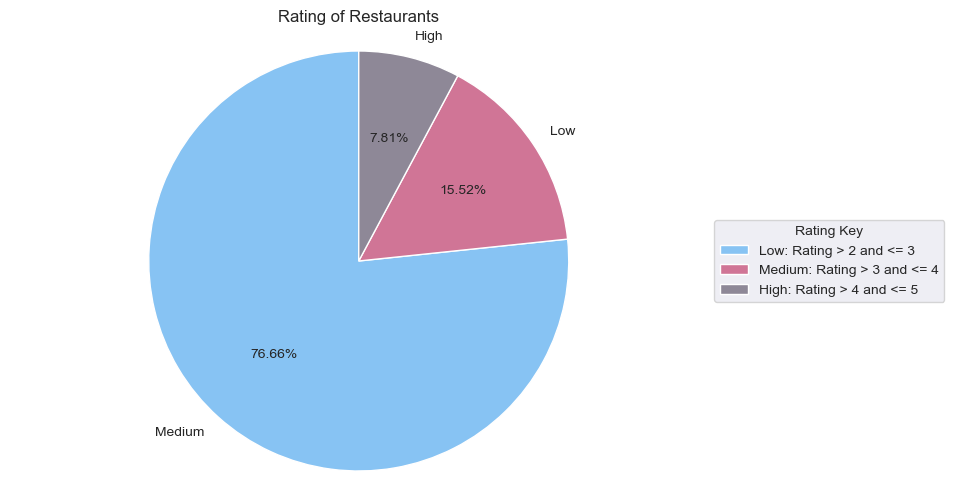

In [79]:
rating_bins = pd.cut(df['RATING'], [2,3,4,5], labels=['Low','Medium','High'])
rating_counts = rating_bins.value_counts()
y_values = rating_counts.values
x_categories = rating_counts.index
legend_labels = [
    'Low: Rating > 2 and <= 3',
    'Medium: Rating > 3 and <= 4',
    'High: Rating > 4 and <= 5'
]
colors = ['#87C3F3', '#D07596', '#8E8897']
plt.figure(figsize=(9, 6))
plt.pie(y_values, 
        colors=colors, 
        labels=x_categories,  
        autopct='%1.2f%%',   
        startangle=90)
plt.title("Rating of Restaurants")
plt.axis('equal') 
plt.legend(legend_labels, 
           title="Rating Key", 
           loc="center left", 
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()